In [1]:
library(cmdstanr)

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: /home/dulunche/.cmdstan/cmdstan-2.30.1

- CmdStan version: 2.30.1



In [ ]:
#install_cmdstan()

In [2]:
df = readRDS("goat.rds")

In [ ]:
str(df)

In [3]:
library("tidyverse")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
df <- df %>% group_by(group)

In [5]:
dl <- list(
  N = nrow(df),
  G = length(unique(df$group)),
  time = df$death,
  weight = (df$weight-12)/12,
  event = df$status,
  gid = df %>% group_indices()
)

---

## Full Model

In [6]:
model_full = cmdstan_model("goat_cmd.stan") # full model

In [7]:
fit = model_full$sample(
    data = dl,
    seed = 1234,
    chains = 4,
    parallel_chains = 4,
    refresh =500
)

Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/RtmpsQmLKU/model-1194da63d2a.stan', line 35, column 3 to column 21)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: weibull_lpdf: Scale parameter is 0, but must be positive finite! (in '/tmp/RtmpsQmLKU/model-1194da63d2a.stan', line 39, column 12 to column 44)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this war

Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 2 Iteration:  500 / 2000 [ 25%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: weibull_lpdf: Scale parameter is 0, but must be positive finite! (in '/tmp/RtmpsQmLKU/model-1194da63d2a.stan', line 39, column 12 to column 44)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: weibull_lpdf: Scale parameter is 0, but must be positive finite! (in '/tmp/RtmpsQmLKU/model-1194da63d2a.stan', line 39, column 12 to column 44)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this 

Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:  500 / 2000 [ 25%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: weibull_lpdf: Scale parameter is 0, but must be positive finite! (in '/tmp/RtmpsQmLKU/model-1194da63d2a.stan', line 39, column 12 to column 44)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: weibull_lpdf: Scale parameter is 0, but must be positive finite! (in '/tmp/RtmpsQmLKU/model-1194da63d2a.stan', line 39, column 12 to column 44)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this 

Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:  500 / 2000 [ 25%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/RtmpsQmLKU/model-1194da63d2a.stan', line 35, column 3 to column 21)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/tmp/RtmpsQmLKU/model-1194da63d2a.stan', line 35, column 3 to column 21)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warnin

Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 2 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 2 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 3 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 3 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 4 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 4 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 2 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 3 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 4 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 1 finished in 2.4 seconds.
Chain 2 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 2 finished in 2.3 seconds.
Chain 3 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 4 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 3 finished in 2.4 seconds.
Chain 4 finished in 2.3 seconds.

All 4 chains finished successfully.
Mean chain execution ti

In [8]:
fit$summary()

variable,mean,median,sd,mad,q5,q95,rhat,ess_bulk,ess_tail
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lp__,-478.04731825,-477.6960000,2.05275942,1.92738000,-481.90010000,-475.3148500,1.0011934,1570.836,2702.992
a,2.02248948,2.0203800,0.50775212,0.50511441,1.18988050,2.8695105,1.0030105,1674.470,1945.301
a_group[1],1.10581780,1.0933000,0.61444810,0.60572957,0.08680083,2.1251395,1.0009941,2174.049,2443.284
a_group[2],0.81225192,0.8102925,0.52636315,0.52795015,-0.06924538,1.6812900,1.0025830,1749.515,2358.171
a_group[3],0.11913338,0.1297840,0.52844207,0.52748684,-0.74407605,1.0043515,1.0022037,1779.708,2210.002
b_group[1],-0.86757754,-0.8642100,0.70291372,0.69484273,-2.03676800,0.2908553,1.0012443,2968.505,2107.330
b_group[2],-0.15174272,-0.1581950,0.22021959,0.22024561,-0.50164325,0.2124806,0.9998441,3566.841,2774.248
b_group[3],-0.04301133,-0.0423636,0.22774731,0.22566951,-0.41697025,0.3293727,1.0014728,3840.794,2854.696
k,0.72782758,0.7275415,0.05107462,0.05089395,0.64609150,0.8104548,1.0000121,3408.715,2575.306


In [9]:
fit$diagnostic_summary()

$num_divergent
[1] 0 0 0 0

$num_max_treedepth
[1] 0 0 0 0

$ebfmi
[1] 1.0002820 1.1734733 0.9825646 0.8614326

## Posterior Checks

In [10]:
library(rstan)

Loading required package: StanHeaders

rstan (Version 2.21.7, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


Attaching package: ‘rstan’


The following object is masked from ‘package:tidyr’:

    extract




In [11]:
fit$save_object(file="cmd_fit_full.RDS")

In [12]:
fit <- readRDS("cmd_fit_full.RDS")

In [13]:
stanfit <- rstan::read_stan_csv(fit$output_files())

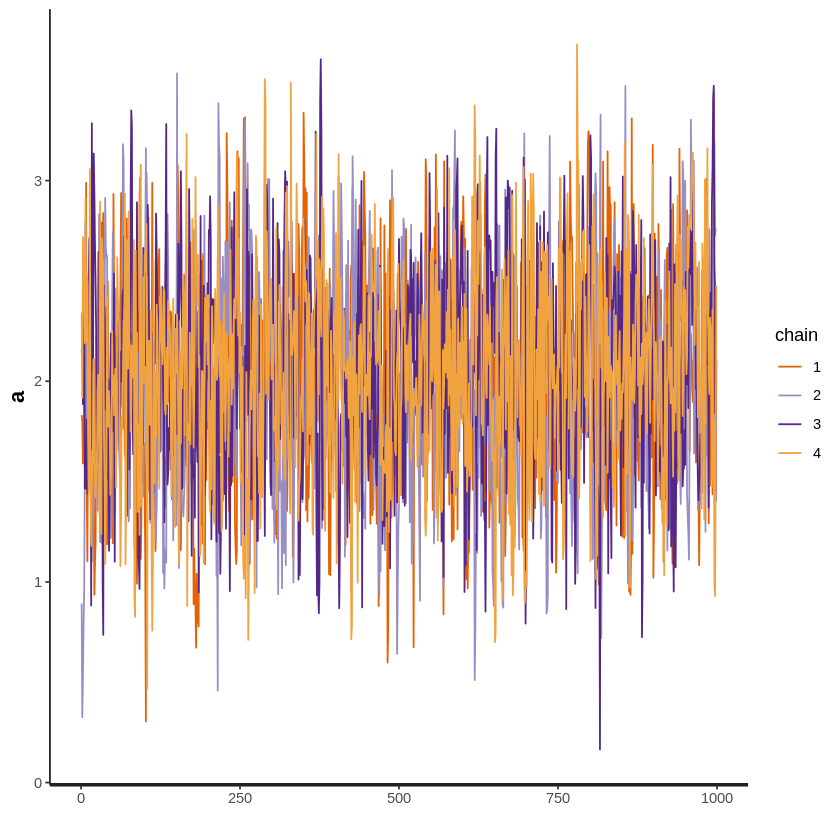

In [14]:
traceplot(stanfit, pars=c("a"))

In [15]:
theme_Posterior = theme(
  axis.line.x = element_line(arrow=arrow(length=unit(0.05, "cm")), lineend = "butt"),
  panel.background = element_rect(fill="transparent"), 
  panel.border = element_rect(fill="transparent"),
  plot.background = element_rect(fill = "transparent"),
  #panel.spacing.y = unit(1,"lines"),
  plot.margin = unit(c(1,1,1,1), "cm"), 
  #
  axis.title.y = element_blank(), 
  axis.text.y = element_text(color = "grey20", size = 8, angle = 0, hjust = 1, vjust = 0, face = "plain"),
  axis.text.x = element_text(color="grey20",hjust=1, vjust=1, size=8, angle=50, face="plain"), 
  axis.ticks.y = element_blank()
)

ci_level: 0.9 (90% intervals)

outer_level: 0.95 (95% intervals)



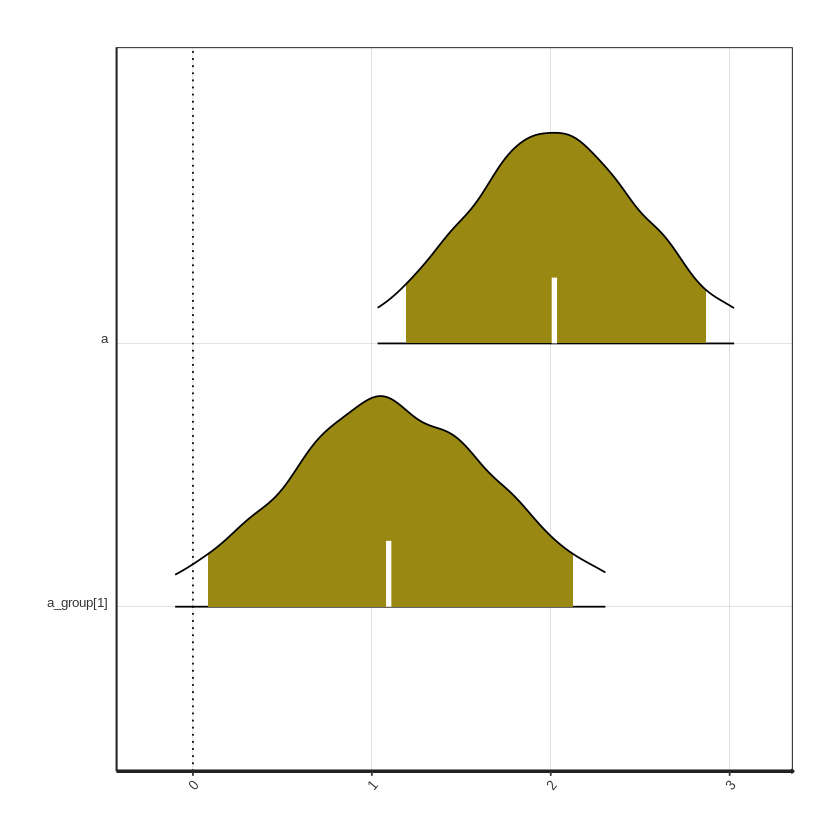

In [16]:
plot(stanfit, 
     pars=names(stanfit)[c(1,2)], 
     show_density=TRUE,
     fill_color="#998811",
     est_color="#ffffff",
     ci_level=0.9, outer_level=0.95) +
geom_vline(xintercept = 0, linetype=3, size=0.5) + 
theme_Posterior

In [17]:
library(bayesplot)

This is bayesplot version 1.9.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



In [18]:
draws <- extract(stanfit)

In [ ]:
str(draws)

In [ ]:
draws$pred

Warning message:
“Removed 54299 rows containing non-finite values (stat_density).”


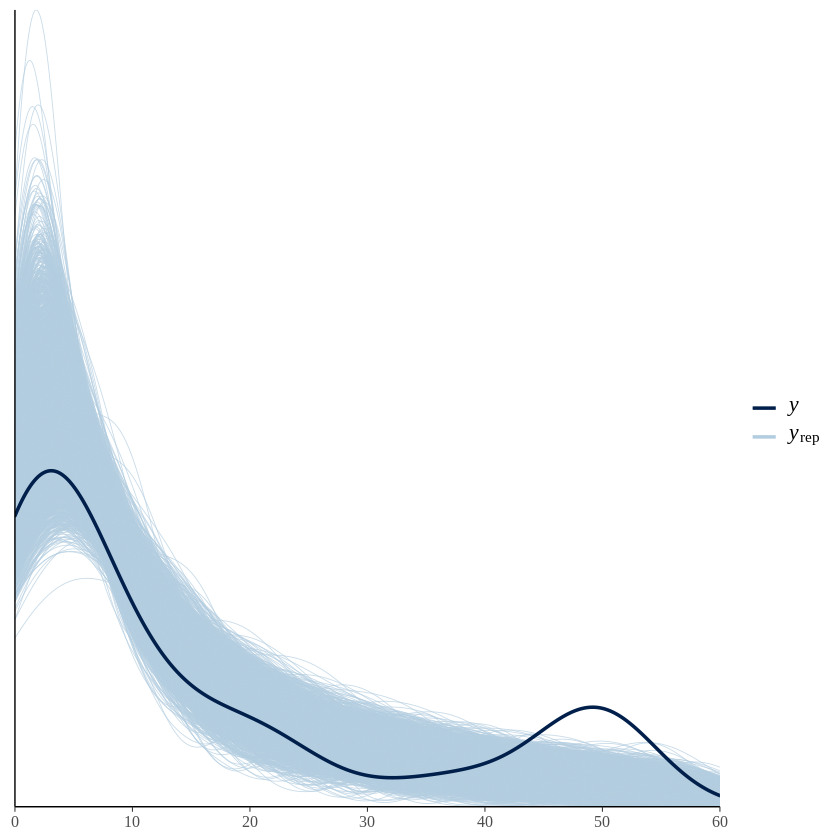

In [19]:
ppc_dens_overlay(y=dl$time, yrep = draws$pred) +
xlim(c(0,60))

## ECCD: Empirical Complementary Cumulative Distribution 

In [20]:
library(tidybayes)
library(mltools)


Attaching package: ‘mltools’


The following object is masked from ‘package:tidyr’:

    replace_na




In [21]:
a <-  posterior::as_draws_rvars(fit$draws())
post_draws <- posterior::draws_of(a$pred)[1:4000,]

In [22]:
N = 1000
dat <- data.frame(id=as.numeric(), pred=as.numeric())

In [23]:
for (i in 1:N){
    obj <- empirical_cdf(post_draws[i,], ubounds = 1:50)
    obj <-  1 - obj$CDF
    obj <- data.frame(id=rep(i,50), x=seq(1,50), y=obj)
    dat <- rbind(dat, obj)
}

In [24]:
library(survminer)
library(survival)

Loading required package: ggpubr


Attaching package: ‘survival’


The following object is masked from ‘package:survminer’:

    myeloma




In [25]:
df_survfit <-  data.frame(time=dl$time, event = dl$event)

In [26]:
surf <- survfit(Surv(time, event)~1, data=df_survfit)

In [27]:
p <- ggsurvplot(surf)

In [28]:
data_obs <- p$data.survplot

In [29]:
data_obs <- data.frame(surv=c(1, data_obs$surv), time=c(0, data_obs$time))

In [ ]:
data_obs

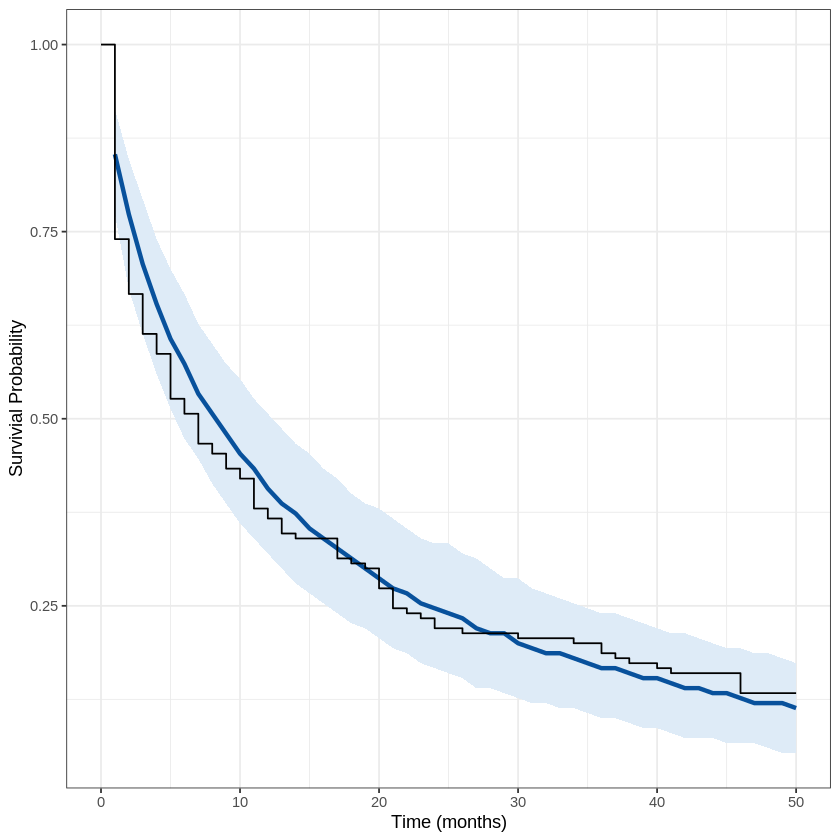

In [30]:
dat %>%
    ggplot(aes(x=x, y=y)) +
    stat_lineribbon(aes(y=y), .width=c(.95), color="#08519C") +
    labs(x="Time (months)", y="Survivial Probability") +
    scale_fill_brewer() + 
    theme_bw() +
    geom_step(data = data_obs, mapping=aes(y=surv, x = time)) +
    theme(legend.position = "none") + xlim(0,50)

### Parameters Estimate

Warning message:
“`prob_outer` (0.9) is less than `prob` (0.95)
... Swapping the values of `prob_outer` and `prob`”


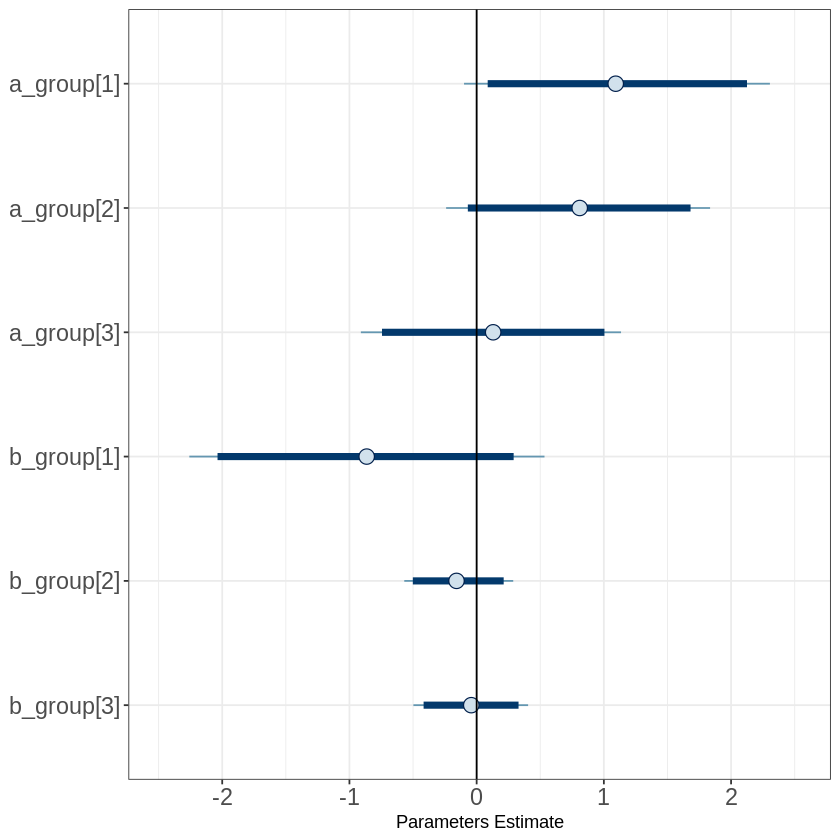

In [31]:
mcmc_intervals(fit$draws(c("a_group", "b_group")), prob=0.95) +
vline_0() +
theme_bw() +
theme(axis.text=element_text(size=14)) +
labs(x="Parameters Estimate")


## Interactions

In [32]:
fit <- readRDS("cmd_fit_full.RDS")

In [33]:
pred <- fit$draws(c("pred"), format="matrix")
pred_mean <- apply(pred, 2, mean)
weight <- dl$weight
group <- dl$gid

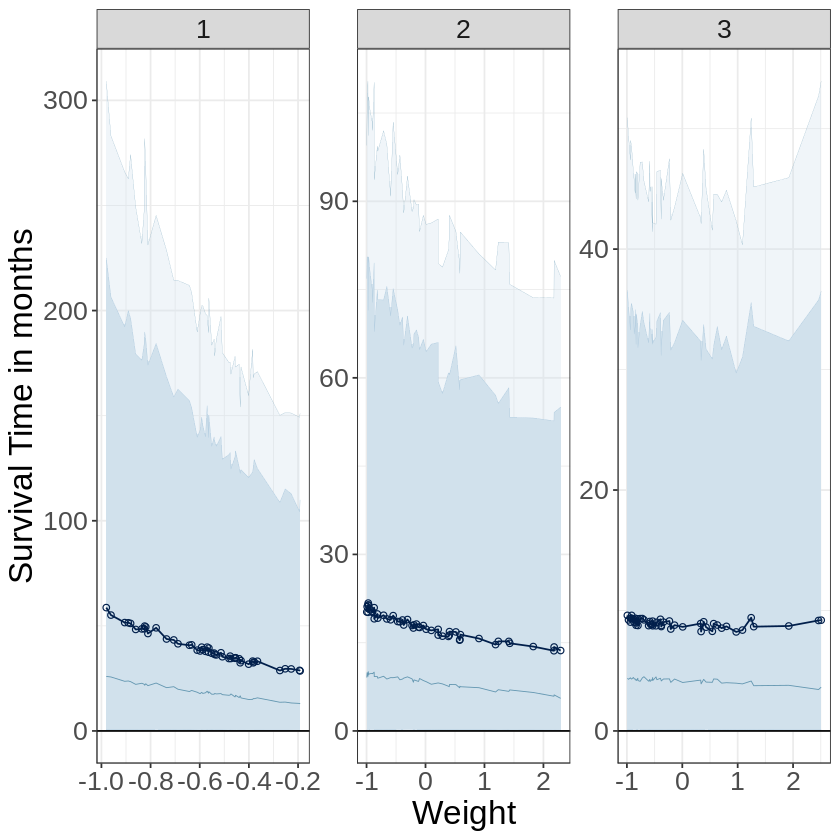

In [34]:
ppc_ribbon_grouped(pred_mean, pred, x=weight, group=group, prob = 0.95, y_draw = "both") +
labs(y="Survival Time in months", x="Weight") +
theme_bw() +
legend_none() +
hline_0() +
theme(axis.title = element_text(size=20)) +
theme(text=element_text(size=20))

In [35]:
diff13 <- fit$draws(c("diff_13"), format="matrix")
diff12 <- fit$draws(c("diff_12"), format="matrix")
diff23 <- fit$draws(c("diff_23"), format="matrix")

In [36]:
diff13_mean <- apply(diff13, 2, mean)
diff12_mean <- apply(diff12, 2, mean)
diff23_mean <- apply(diff23, 2, mean)

In [37]:
library(ggpubr)

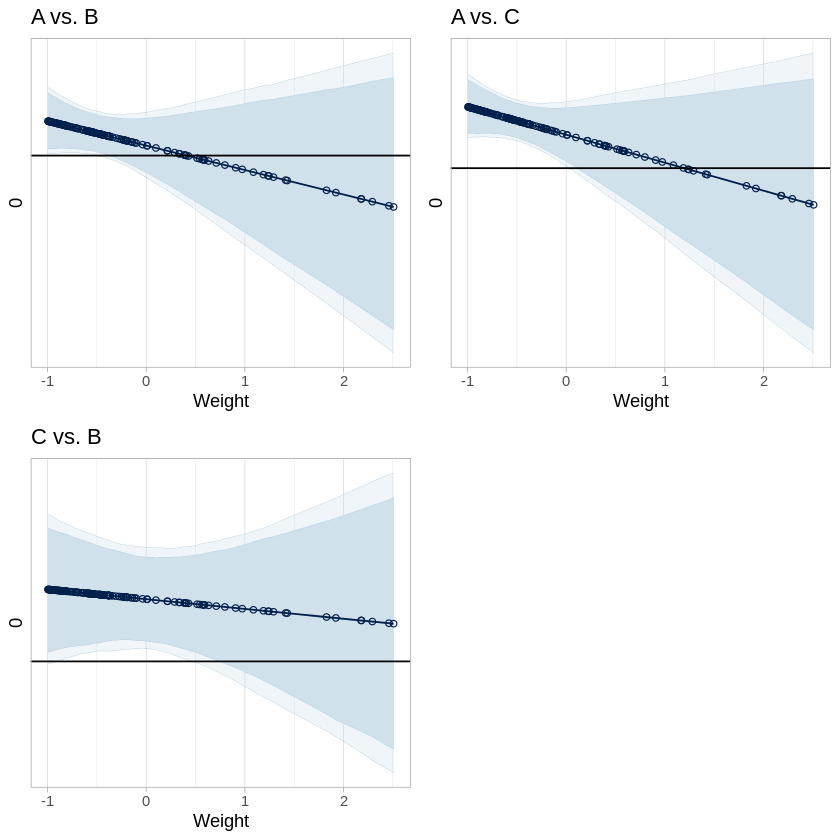

In [48]:
ggarrange(
    ppc_ribbon(
        diff12_mean, diff12, x=weight, prob=0.95, y_draw = "both"
    ) +
    labs(y="Difference between Treatment A and B", x="Weight") +
    theme_light() +
    legend_none() +
    hline_0() +
    scale_y_continuous(0,600, 50) +
    ggtitle("A vs. B"),

    ppc_ribbon(
        diff13_mean, diff13, x=weight, prob=0.95, y_draw = "both"
    ) +
    labs(y="Difference between Treatment A and C", x="Weight") +
    theme_light() +
    legend_none() +
    hline_0() +
    scale_y_continuous(0,600, 50) +
    ggtitle("A vs. C"),    

    ppc_ribbon(
        diff23_mean, diff23, x=weight, prob=0.95, y_draw = "both"
    ) +
    labs(y="Difference between Treatment B and C", x="Weight") +
    theme_light() +
    legend_none() +
    hline_0() +
    scale_y_continuous(0,600, 50) +
    ggtitle("C vs. B"),
    ncol=2, nrow=2
)